In [4]:
# import lib
import numpy as np 
import matplotlib.pyplot as plt 
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'
from PIL import Image
import requests
from io import BytesIO

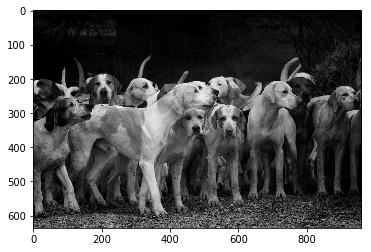

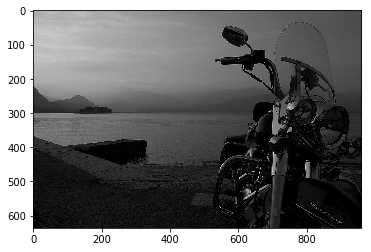

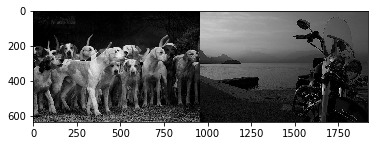

(636, 960) (636, 960)


In [29]:
url = "https://cdn.pixabay.com/photo/2017/08/29/01/22/dog-2691871_960_720.jpg"
img_1 = np.array(Image.open(BytesIO(requests.get(url).content))).mean(2)[:636,:]
url = "https://cdn.pixabay.com/photo/2017/06/22/10/00/harley-2430193_960_720.jpg"
img_2 = np.array(Image.open(BytesIO(requests.get(url).content))).mean(2)

plt.imshow(img_1)
plt.show()
plt.imshow(img_2)
plt.show()
plt.imshow(np.hstack((img_1, img_2)))
plt.show()

print(img_1.shape,img_2.shape)

Text(0.5, 1.0, 'T2 slice histogram')

<Figure size 2160x2160 with 0 Axes>

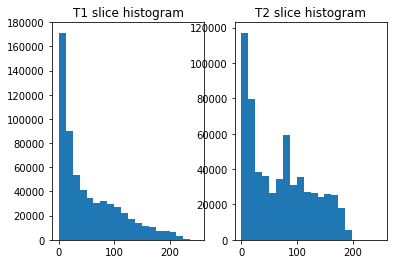

In [36]:
# show histogram
plt.figure(figsize=(30,30))
fig, axes = plt.subplots(1, 2)
axes[0].hist(img_1.ravel(), bins=20)
axes[0].set_title('T1 slice histogram')
axes[1].hist(img_2.ravel(), bins=20)
axes[1].set_title('T2 slice histogram')

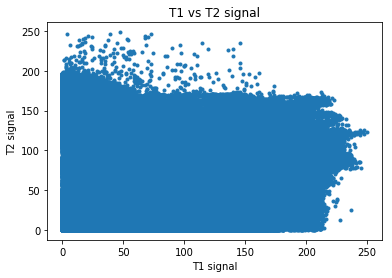

-0.21232667829900714

In [41]:
plt.plot(img_1.ravel(), img_2.ravel(), '.')
plt.xlabel('T1 signal')
plt.ylabel('T2 signal')
plt.title('T1 vs T2 signal')
plt.show()
np.corrcoef(img_1.ravel(), img_2.ravel())[0, 1]

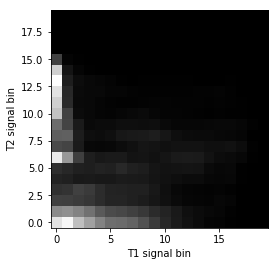

In [51]:
hist_2d, x_edges, y_edges = np.histogram2d(img_1.ravel(),img_2.ravel(),bins=20)
# Plot as image, arranging axes as for scatterplot
# We transpose to put the T1 bins on the horizontal axis
# and use 'lower' to put 0, 0 at the bottom of the plot
plt.imshow(hist_2d.T, origin='lower')
plt.xlabel('T1 signal bin')
plt.ylabel('T2 signal bin')
plt.show()

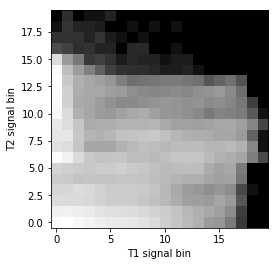

In [52]:
# Show log histogram, avoiding divide by 0
hist_2d_log = np.zeros(hist_2d.shape)
non_zeros = hist_2d != 0
hist_2d_log[non_zeros] = np.log(hist_2d[non_zeros])
plt.imshow(hist_2d_log.T, origin='lower')

plt.xlabel('T1 signal bin')

plt.ylabel('T2 signal bin')
plt.show()

In [53]:
# function
def mutual_information(hgram):
    """ Mutual information for joint histogram
    """
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))
mutual_information(hist_2d)

0.18817105107696297

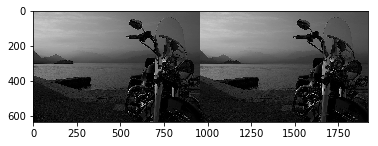

In [65]:
t2_slice_moved = np.zeros(img_2.shape)
t2_slice_moved[1:, :] = img_2[:-1, :]
plt.imshow(np.hstack((img_2, t2_slice_moved)))
plt.show()

In [71]:
# show the image
random_noise = np.random.randn(img_1.shape[0],img_1.shape[1])
hist_2d_moved, x_edges, y_edges = np.histogram2d(img_1.ravel(),random_noise.ravel(),bins=20)
mutual_information(hist_2d_moved)

0.0002577498273611883

In [76]:
from scipy.stats import chi2_contingency
from sklearn.metrics import mutual_info_score

def mutual_information(hgram):
    """ Mutual information for joint histogram
    """
    # Convert bins counts to probability values
    pxy = hgram / float(np.sum(hgram))
    px = np.sum(pxy, axis=1) # marginal for x over y
    py = np.sum(pxy, axis=0) # marginal for y over x
    px_py = px[:, None] * py[None, :] # Broadcast to multiply marginals
    # Now we can do the calculation using the pxy, px_py 2D arrays
    nzs = pxy > 0 # Only non-zero pxy values contribute to the sum
    return np.sum(pxy[nzs] * np.log(pxy[nzs] / px_py[nzs]))
def calc_MI1(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    g, p, dof, expected = chi2_contingency(c_xy, lambda_="log-likelihood")
    mi = 0.5 * g / c_xy.sum()
    return mi
def calc_MI2(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

print(mutual_information(hist_2d_moved))
print(calc_MI1(img_1.ravel(),random_noise.ravel(),bins=20))
print(calc_MI2(img_1.ravel(),random_noise.ravel(),bins=20))

0.0002577498273611883
0.0002577498273613351
0.0002577498273606876


# Reference 
1. Mutual information as an image matching metric â€” Tutorials on imaging, computing and mathematics. (2019). Matthew-brett.github.io. Retrieved 20 February 2019, from https://matthew-brett.github.io/teaching/mutual_information.html
2. numpy, O., & Weckesser, W. (2013). Optimal way to compute pairwise mutual information using numpy. Stack Overflow. Retrieved 20 February 2019, from https://stackoverflow.com/questions/20491028/optimal-way-to-compute-pairwise-mutual-information-using-numpy
3. rmaestre/Mutual-Information. (2019). GitHub. Retrieved 20 February 2019, from https://github.com/rmaestre/Mutual-Information/blob/master/it_tool.py
4. Estimating entropy and mutual information with scikit-learn. (2019). Gist. Retrieved 20 February 2019, from https://gist.github.com/GaelVaroquaux/ead9898bd3c973c40429